In [ ]:
from hwtmode.data import load_patch_files, combine_patch_data, min_max_scale, storm_max_value, get_meta_scalars
import yaml
import numpy as np
import matplotlib.pyplot as plt


In [2]:
config = "../config/ws_mode_cnn_train_201210_hm_masked.yml"
with open(config, "r") as config_file:
    config = yaml.load(config_file, Loader=yaml.Loader)

In [3]:
# Load training data
print(f"Loading training data period: {config['train_start_date']} to {config['train_end_date']}")
data_input = {}
output = {}
out_max = {}
labels = {}
meta = {}
meta_df = {}
input_combined = {}
input_scaled = {}
scale_values = {}
predictions = {}
modes = ["train", "val", "test"]
# Load training, validation, and testing data
for mode in modes:
    data_input[mode], output[mode], meta[mode] = load_patch_files(config[mode + "_start_date"],
                                                             config[mode + "_end_date"],
                                                             config["data_path"],
                                                             config["input_variables"],
                                                             config["output_variables"],
                                                             config["meta_variables"],
                                                             config["patch_radius"],
                                                             config["mask"])
    input_combined[mode] = combine_patch_data(data_input[mode], config["input_variables"])
    if mode == "train":
        input_scaled[mode], scale_values[mode] = min_max_scale(input_combined[mode])
    else:
        input_scaled[mode], scale_values[mode] = min_max_scale(input_combined[mode], scale_values["train"])
    out_max[mode] = storm_max_value(output[mode][config["output_variables"][0]], meta[mode]["masks"])
    meta_df[mode] = get_meta_scalars(meta[mode])
    print(meta_df[mode].columns)
    if config["classifier"]:
        labels[mode] = np.where(out_max[mode] >= config["classifier_threshold"], 1, 0)
    else:
        labels[mode] = out_max[mode]
# del data_input, out_max


  0%|                                 | 0/4 [00:00<?, ?it/s]

Loading training data period: 2010-10-01 to 2010-10-31


  0%|                                 | 0/1 [00:00<?, ?it/s]

REFL_COM_curr
['time', 'centroid_lon', 'centroid_lat', 'centroid_i', 'centroid_j', 'track_id', 'track_step', 'run_date']
Index(['time', 'centroid_lon', 'centroid_lat', 'centroid_i', 'centroid_j',
       'track_id', 'track_step', 'run_date'],
      dtype='object')


  0%|                                 | 0/1 [00:00<?, ?it/s]

REFL_COM_curr
['time', 'centroid_lon', 'centroid_lat', 'centroid_i', 'centroid_j', 'track_id', 'track_step', 'run_date']
Index(['time', 'centroid_lon', 'centroid_lat', 'centroid_i', 'centroid_j',
       'track_id', 'track_step', 'run_date'],
      dtype='object')


100%|█████████████████████████| 1/1 [00:01<00:00,  1.83s/it]

REFL_COM_curr
['time', 'centroid_lon', 'centroid_lat', 'centroid_i', 'centroid_j', 'track_id', 'track_step', 'run_date']
Index(['time', 'centroid_lon', 'centroid_lat', 'centroid_i', 'centroid_j',
       'track_id', 'track_step', 'run_date'],
      dtype='object')


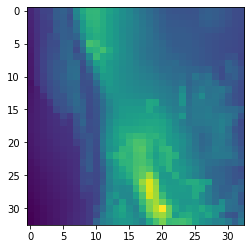

In [4]:
plt.imshow(input_scaled["train"].values[0, :, :, 0], interpolation='nearest')

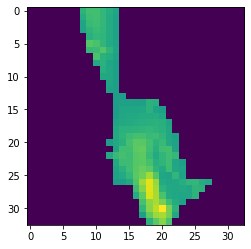

In [11]:
plt.imshow(input_scaled["train"].values[0, :, :, 0], interpolation='nearest')